<a href="https://colab.research.google.com/github/sruthiravindra/DataScience/blob/master/EDA_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_data/titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Inference:

The data set contains 891 records in total with 12 columns.

Of the 12 columns the column Embarked contains the target variable.

Following are the attributes of the dataset:
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'

From visual inspection the below ranges have been derived. Later programmatically we will derive the range for each attribute

'PassengerId' - nominal - [1,891]

'Survived' - binary - [0,1]

'Pclass' - Ordinal - [1,2,3]

'Name' - Nominal - String

'Sex' - Nominal - [male, female]

'Age' - Numeric - [0.24-80]

'SibSp' - Nominal - [0,1,2,3,4,5,8]

'Parch' - Ordinal - [0,1,2,3,4,5,6]

'Ticket' - Nominal - String

'Fare' - Numeric - [0-512.32]

'Cabin' - Nominal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
  categorical_cols = df.select_dtypes(include=['object']).columns
  distinct_vals = {cols: df[cols].unique() for cols in categorical_cols}

  for col, values in distinct_vals.items():
    print(f"{col}:{values[:10]}")

Name:['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
Sex:['male' 'female']
Ticket:['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']
Cabin:[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78']
Embarked:['S' 'C' 'Q' nan]


In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

col_range = {col: (df[col].min(), df[col].max()) for col in numeric_cols}

for col, range in col_range.items():
  print(f"{col}: {range}")


PassengerId: (1, 891)
Survived: (0, 1)
Pclass: (1, 3)
Age: (0.42, 80.0)
SibSp: (0, 8)
Parch: (0, 6)
Fare: (0.0, 512.3292)


# check for null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print(df['Age'].isnull().sum()/len(df['Age']))
print(df['Cabin'].isnull().sum()/len(df['Cabin']))

0.19865319865319866
0.7710437710437711


**Inference**:

Almost 20 percent of the Age data is missing while almost 77% of Cabin data is missing.

The target attribute has 2 missing data.

The proportion of Age missing is smaller hence we can use some replacement  fill the missing values.

But at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

*drop columns that will not contribute in the analysis*

In [11]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

*Drop Cabin Attribute Since it Contains a lot of missing values more than 77%*

In [12]:
df.drop(columns=['Cabin'], inplace=True)

Fill missing values:

Missing value of Integer columns can be filled using thier mean

Missing values of Categorical columns can be filled using median/frequency

*Fill missing values for age columns*

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

*Fill missing values for embarked columns*

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Category 'S' has the highest frequency so we can consider the most popular category and apply the same to the missing data

In [15]:
df['Embarked'].fillna('S', inplace=True)

In [16]:
# it was causing wrong count plot hence converting its type to category
# df['Pclass']=df['Pclass'].astype('category')

# UNIVARIATE ANALYSIS - SURVIVED

In [17]:
df['Survived'].isnull().sum()

0

<Axes: xlabel='Survived', ylabel='count'>

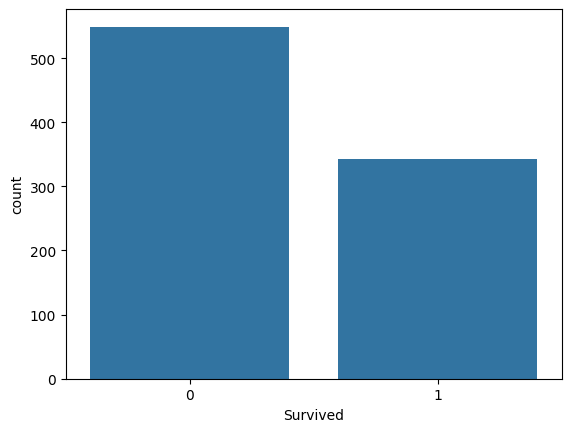

In [18]:
sns.countplot(x='Survived',data=df)

In [19]:
df['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

*Inference:*

We have already handled the null values.

38% passengers survived while 61% drowned

Further analysis will be required which will be done during univariate analysis.

# UNIVARIATE ANALYSIS - AGE

In [20]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

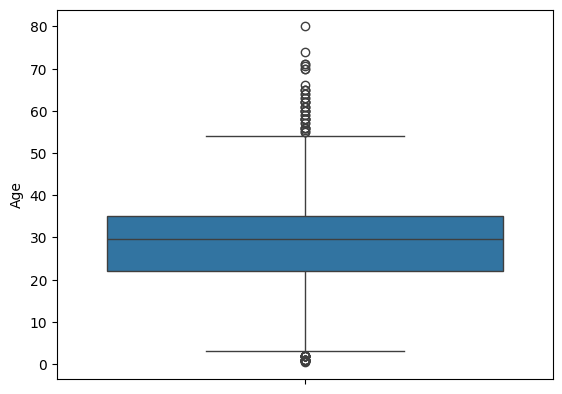

In [21]:
sns.boxplot(df['Age'])

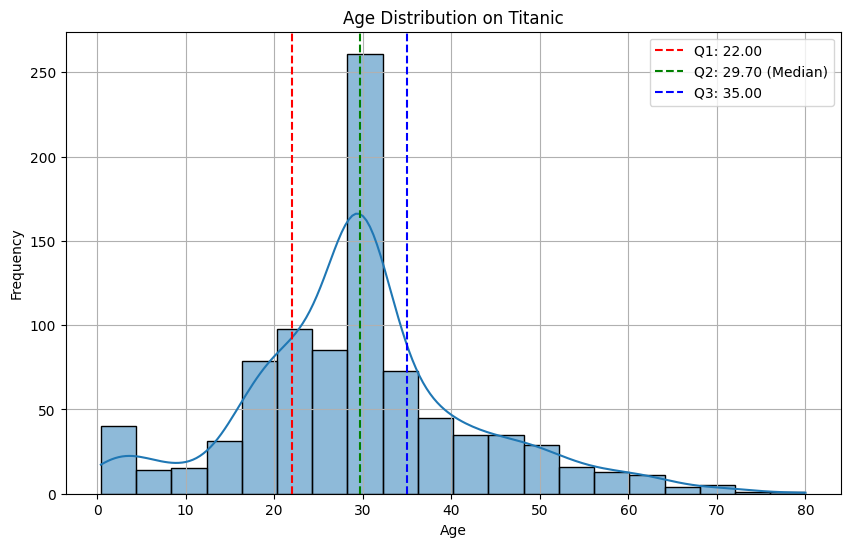

In [22]:

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)

# Calculate quartiles
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

# Annotate quartile ranges on the plot
plt.axvline(q1, color='r', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='g', linestyle='--', label=f'Q2: {q2:.2f} (Median)')
plt.axvline(q3, color='b', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
df['Age'].skew()

0.4344880940129925

In [24]:
df[df['Age'] > 65]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.0,0,0,10.5000,S
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
851,0,3,male,74.0,0,0,7.7750,S


Inference

Age is a normal distribution.

Maximum number of passerger were around the age of 35 years.

22% of the population is below 25 years of age.

50% of the population is below 29 years of age.

Max age of a passenger is 80 years.

Data is skewed to the right.

The boxplot shows that there are outliers in above and below the interquartile range, with more outliers above Q3 which explains the reason for the skewness.





# UNIVARIATE ANALYSIS - SEX

In [25]:
df['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [26]:
male = df["Sex"].value_counts()[0]
female = df["Sex"].value_counts()[1]

print(f"Number of male passenger: {male}")
print(f"Number of female passenger: {female}")

Number of male passenger: 577
Number of female passenger: 314


<Axes: xlabel='count', ylabel='Sex'>

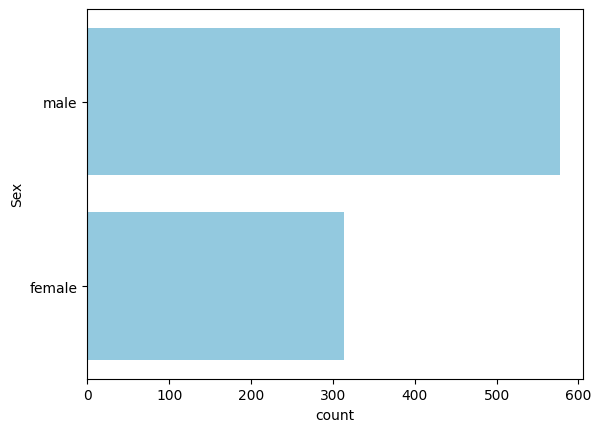

In [27]:
sns.countplot(df['Sex'], color='skyblue')

Inference:

From the univariate analysis we understand that

Around 65% passengers were male i.e 577 passengers
Around 35% passengers were female i.e 314 passengers

# UNIVARIATE ANALYSIS :  FARE

In [28]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Fare'>

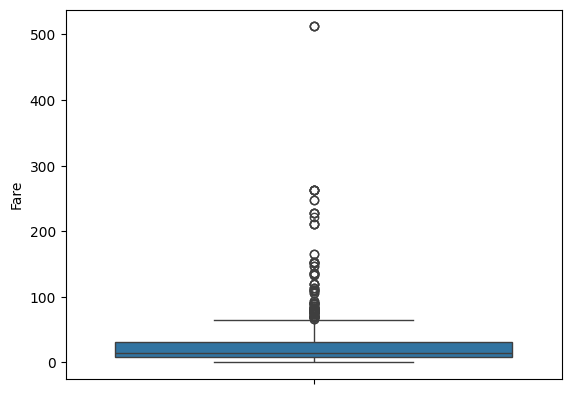

In [29]:
sns.boxplot(df['Fare'])

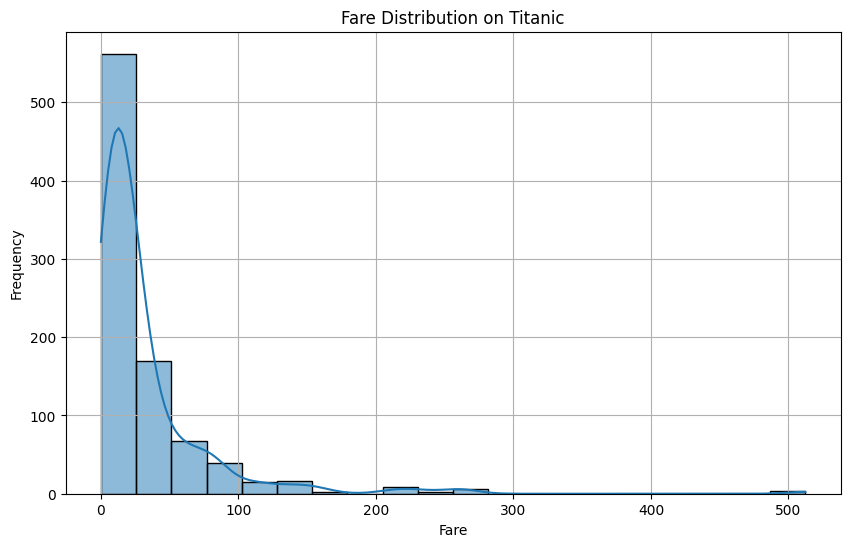

In [30]:

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=20, kde=True)


plt.title('Fare Distribution on Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
df['Fare'].skew()

4.787316519674893

In [32]:
df[df['Fare'] > 250]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
258,1,1,female,35.0,0,0,512.3292,C
311,1,1,female,18.0,2,2,262.3750,C
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
742,1,1,female,21.0,2,2,262.3750,C


In [33]:
df[df["Fare"]==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.000000,0,0,0.0,S
263,0,1,male,40.000000,0,0,0.0,S
271,1,3,male,25.000000,0,0,0.0,S
277,0,2,male,29.699118,0,0,0.0,S
302,0,3,male,19.000000,0,0,0.0,S
413,0,2,male,29.699118,0,0,0.0,S
466,0,2,male,29.699118,0,0,0.0,S
481,0,2,male,29.699118,0,0,0.0,S
597,0,3,male,49.000000,0,0,0.0,S
633,0,1,male,29.699118,0,0,0.0,S


*Inference*:

There are passengers with fare = 0 which maybe error. They have all embarked from 'S' and single, no parent accompaning and are all men. Their pClass are not common. Maybe they were crew members or winners of some offers. But they also have ticket number which is confusing.

Maximum passengers have given a fare of 32 while the maximum a passenger may have paid is 512.

Around 25% passengers have paid less than 7 and around 50% have paid less than 14.

This shows that there is a lot of inconsistency in the data which is caused by the outliers.

From the box plot we can see that there are lot of outliers in Fare.

The data is highly positive skewed.

We may need to analyse further as to understand if the outliers are genuine.

# UNIVARIATE ANALYSIS - Embarked

In [34]:
df['Embarked'].value_counts(normalize = True)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [35]:
embarked = df["Embarked"].value_counts()

for i, em in embarked.items():
  print(f"Number of {i} passenger: {em}")

Number of S passenger: 646
Number of C passenger: 168
Number of Q passenger: 77


<Axes: xlabel='count', ylabel='Embarked'>

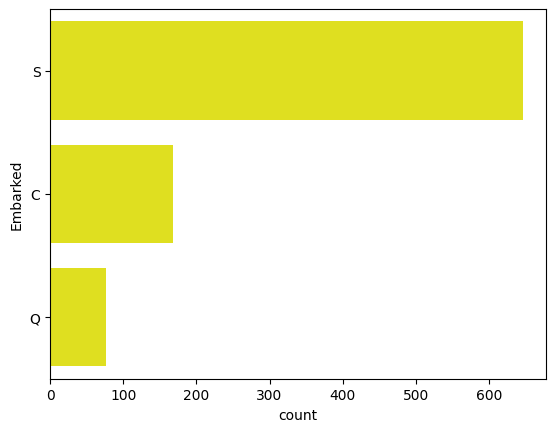

In [36]:
sns.countplot(df['Embarked'], color='yellow')

<Axes: ylabel='Embarked'>

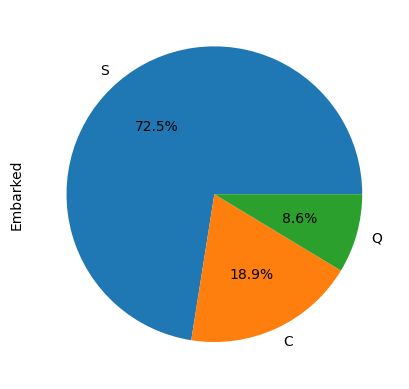

In [37]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Inference:

From the univariate analysis we understand that

Around 72% passengers embarked from 'S' Southampton i.e 646 passengers

Around 18% passengers embarked from 'C' Cherbourg i.e 168 passengers

less than 9% passengers embarked from 'Q' Queenstown i.e 77 passengers


# UNIVARIATE ANALYSIS - Pclass

In [38]:
df['Pclass'].value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [39]:

Pclass = df["Pclass"].value_counts()

for i, em in Pclass.items():
  print(f"Number of {i} passenger: {em}")


Number of 3 passenger: 491
Number of 1 passenger: 216
Number of 2 passenger: 184


<Axes: ylabel='Frequency'>

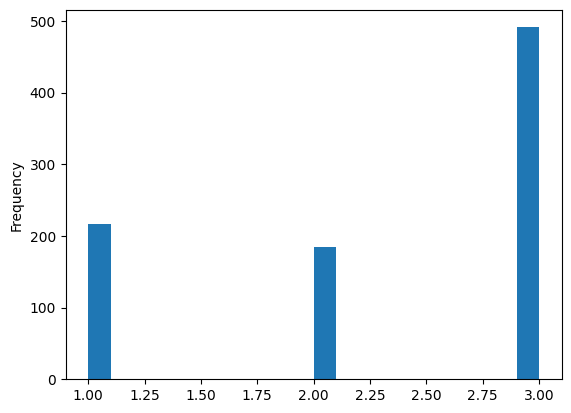

In [40]:
df['Pclass'].plot(kind='hist',bins=20)

Inference:

From the univariate analysis we understand that

Around 55% passengers were in class=3 i.e 491

Around 20% passengers were in class=1 i.e 184

Around 24% passengers were in class=1 i.e 216

Observing that class=3 has more passengers we may infer that pClass=3 maybe the economy class. Looking at the population 2 and 3 are not differentiateable.

# UNIVARIATE ANALYSIS - SibSp

In [41]:
df['SibSp'].value_counts(normalize = True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [42]:
SibSp = df["SibSp"].value_counts()

for i, em in SibSp.items():
  print(f"Number of {i} passenger: {em}")

Number of 0 passenger: 608
Number of 1 passenger: 209
Number of 2 passenger: 28
Number of 4 passenger: 18
Number of 3 passenger: 16
Number of 8 passenger: 7
Number of 5 passenger: 5


<Axes: ylabel='Frequency'>

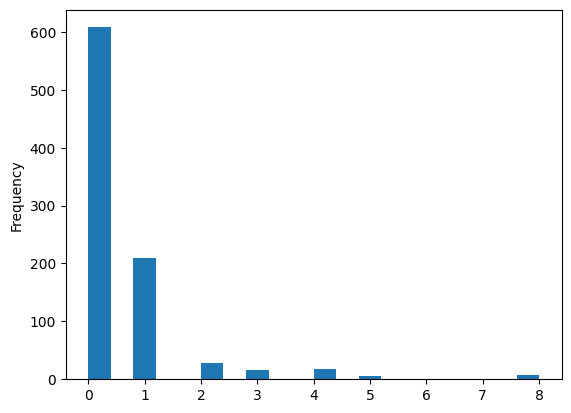

In [43]:
df['SibSp'].plot(kind='hist',bins=20)

<Axes: ylabel='SibSp'>

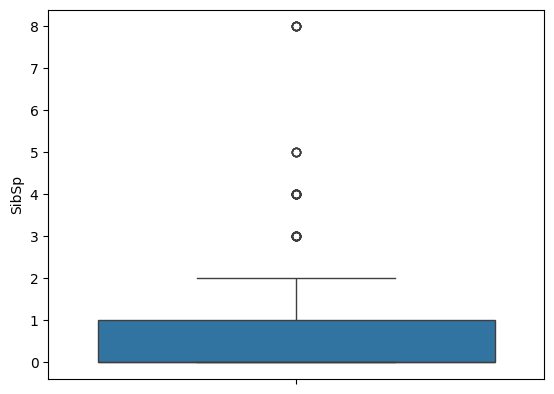

In [44]:
sns.boxplot(data=df['SibSp'])

Inference:

Most of the passengers are single and not travelling with any siblings.

There are passengers would are travelling in a group of 8.

# UNIVARIATE ANALYSIS - Parch

In [45]:
df['Parch'].value_counts(normalize = True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [46]:
Parch = df["Parch"].value_counts()

for i, em in Parch.items():
  print(f"Number of {i} passenger: {em}")

Number of 0 passenger: 678
Number of 1 passenger: 118
Number of 2 passenger: 80
Number of 5 passenger: 5
Number of 3 passenger: 5
Number of 4 passenger: 4
Number of 6 passenger: 1


<Axes: ylabel='Frequency'>

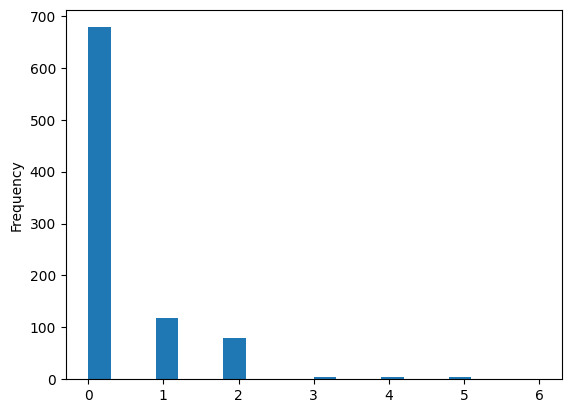

In [47]:
df['Parch'].plot(kind='hist',bins=20)

*Inference*:

Most of the passengers ( 678) are single and not travelling with any parent or children.

118 are travelling with either either 1 parent or 1 child


# BiVariate and Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 1200x600 with 0 Axes>

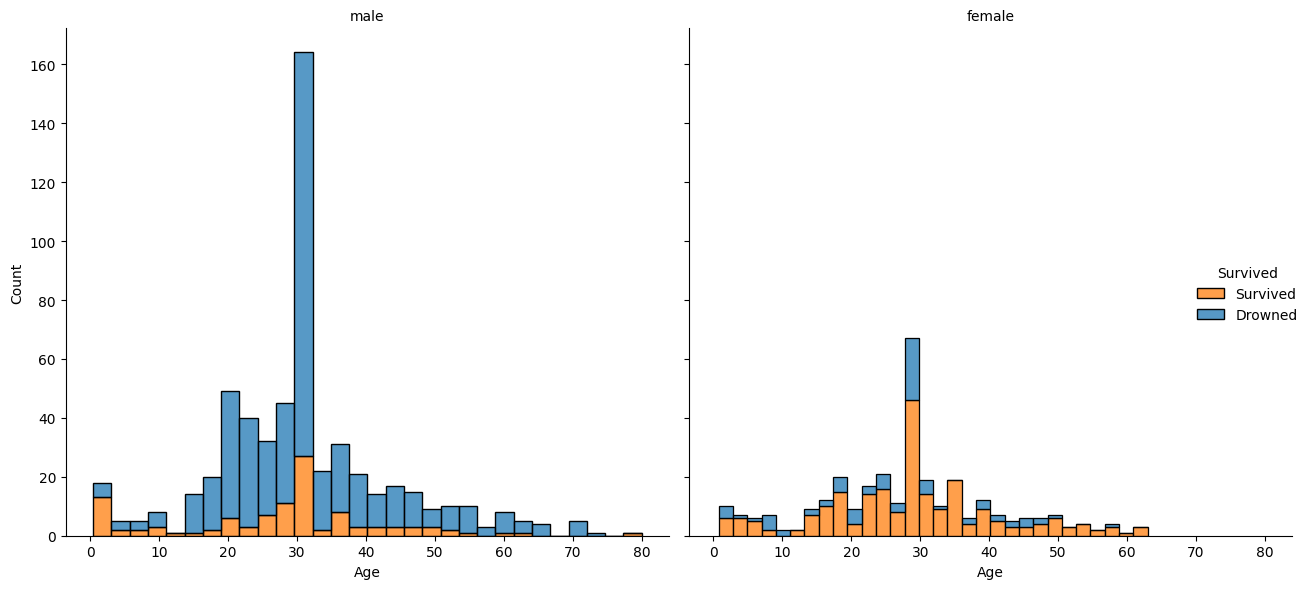

In [78]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a FacetGrid with two columns (one for each sex)
g = sns.FacetGrid(df, col='Sex', height=6)

# Map a histogram to each subset of data
g.map_dataframe(sns.histplot, x='Age', hue='Survived', multiple='stack', bins=30)

# Add title and labels
g.set_titles('{col_name}')
g.set_xlabels('Age')
g.set_ylabels('Count')

# Add a legend
g.add_legend(title='Survived', labels=['Survived', 'Drowned'])

# Show the plot
plt.tight_layout()
plt.show()


Inference:

From the above plot we can see that the percentage of men survivors is far less than it is for female.

For both male and female we can see a spike at around age 30 indicating that the ship consisted out mostly young passengers.

We can also see that the oldest passenger who drowned was a male between 70-80 years and the oldest passenger who survived was  close to 80 years.

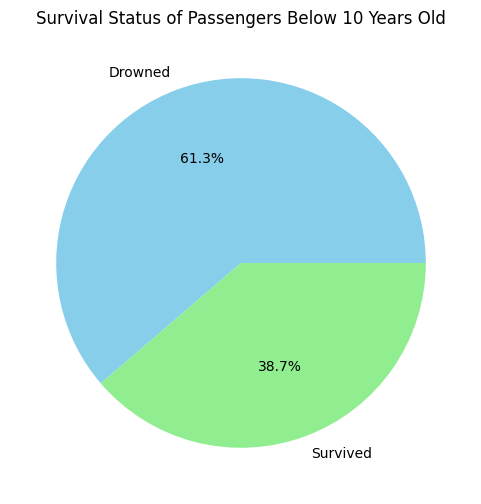

In [49]:

# Filter the DataFrame to select passengers below 10 years of age
passengers_below_10 = df[df['Age'] < 10]

# Count the number of survivors and non-survivors
survived_counts = passengers_below_10['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Drowned', 'Survived'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Survival Status of Passengers Below 10 Years Old')
plt.show()


*Inference:*

Almost 61% of children below 10 years have drowned.

In [70]:

# Filter the DataFrame to select passengers below 10 years of age
passengers_above_70 = df[df['Age'] >= 70]

passengers_above_70

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_bin,family_size,family_type
96,0,1,male,71.0,0,0,34.6542,C,1,1,alone
116,0,3,male,70.5,0,0,7.7500,Q,1,1,alone
493,0,1,male,71.0,0,0,49.5042,C,1,1,alone
630,1,1,male,80.0,0,0,30.0000,S,1,1,alone
672,0,2,male,70.0,0,0,10.5000,S,1,1,alone
745,0,1,male,70.0,1,1,71.0000,S,1,3,small
851,0,3,male,74.0,0,0,7.7750,S,1,1,alone


Inference:

We cant see any particular pattern on why 1 passenger in this group has survived while the others have drowned

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 1200x600 with 0 Axes>

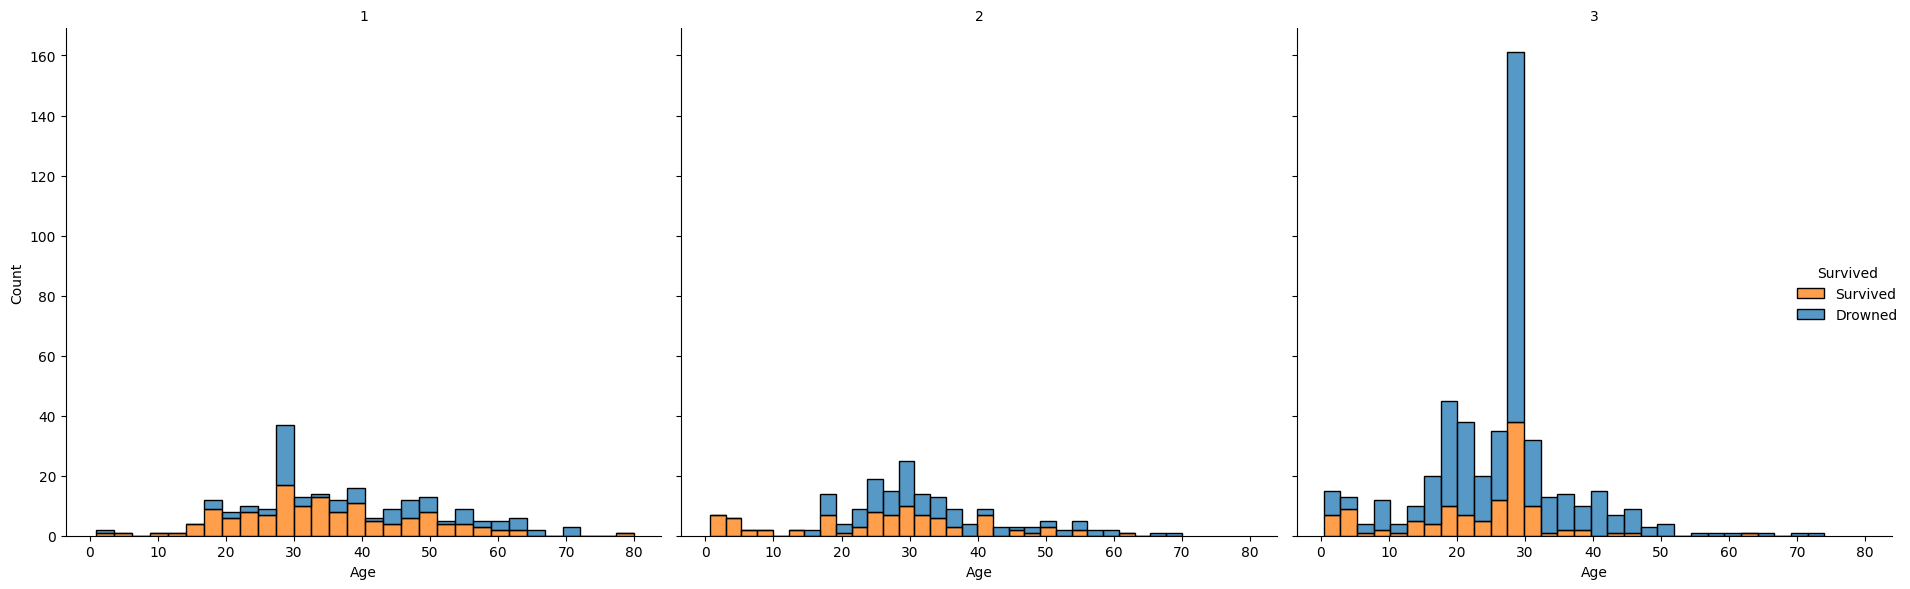

In [79]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a FacetGrid with two columns (one for each sex)
g = sns.FacetGrid(df, col='Pclass', height=6)

# Map a histogram to each subset of data
g.map_dataframe(sns.histplot, x='Age', hue='Survived', multiple='stack', bins=30)

# Add title and labels
g.set_titles('{col_name}')
g.set_xlabels('Age')
g.set_ylabels('Count')

# Add a legend
g.add_legend(title='Survived', labels=['Survived', 'Drowned'])

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-51-c5985a766f24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

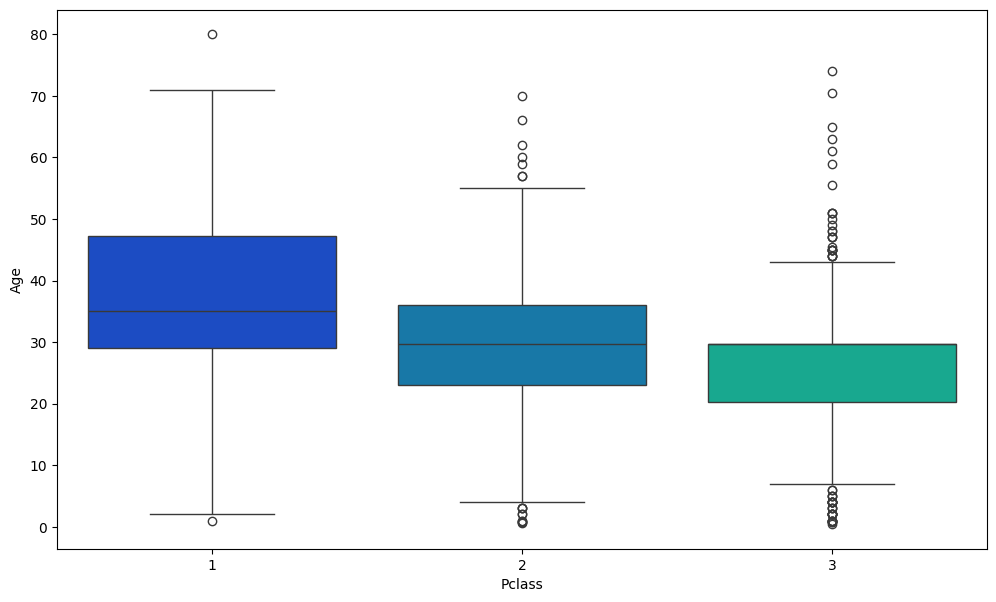

In [51]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [52]:
# To use kdeplot I need to create variables with filtered data for each category
age_1_class = df[(df["Age"] > 0) & (df["Pclass"] == 1)]
age_2_class = df[(df["Age"] > 0) & (df["Pclass"] == 2)]
age_3_class = df[(df["Age"] > 0) & (df["Pclass"] == 3)]

<ipython-input-53-a17d163df724>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
<ipython-input-53-a17d163df724>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
<ipython-input-53-a17d163df724>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
<ipython-input-53-a17d163df724>:36: FutureWarning: 

Passing `palette` 

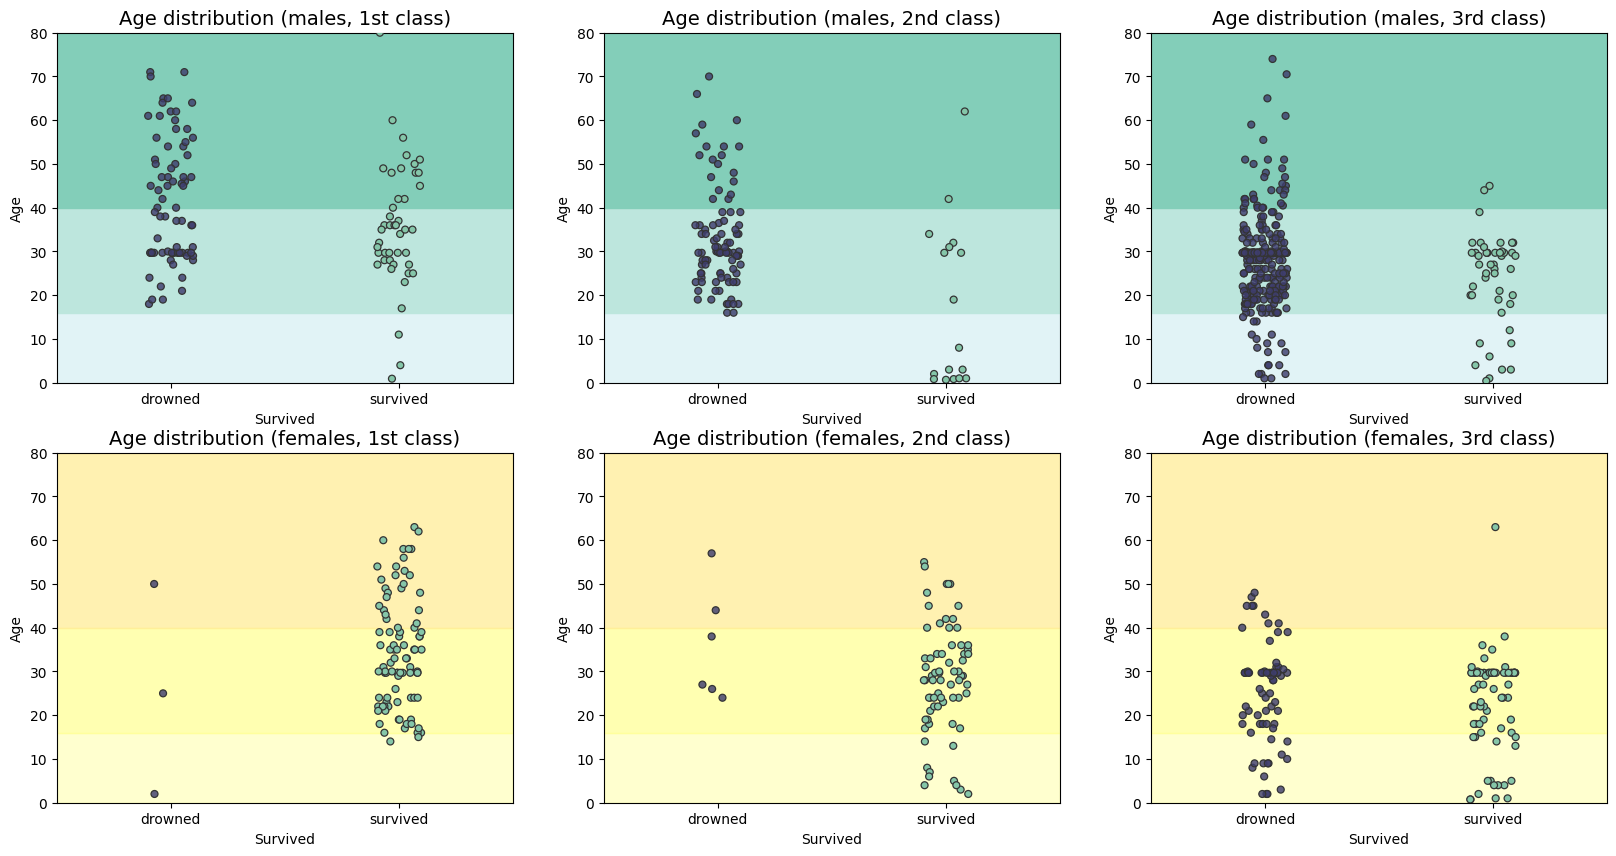

In [53]:
plt.figure(figsize=(20, 10))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

From these graphs (training data only) we can see, that

only one kid (<16) from 1st and 2nd classes are drowned (female from the 1st class).

but children from the 3rd class were not so lucky, looks like chances to survive for passengers <16 were 50/50 for male and female.

most females from 1st and 2nd class are survived, without much difference in Age. Maybe they were given first preference for evacuation.

We can also infer that women and children from 1st and 2nd class have been given preference.

females from 3rd class in Age group 40+ drowned except one.

similar picture for males in 2nd and 3rd classes in the Age group 40+: only 2 from each class are survived.

for 40+ males from 1st class situation were slightly different, there are more survived passengers.

the largest "accumulation" of drowned passengers is observed in the Age group 16-40 males, 3rd class.

In [54]:
import pandas as pd

# Define the fare ranges and corresponding labels
fare_bins = [0, 200, 450, float('inf')]
fare_labels = [1, 2, 3]

# Create the new 'fare_bin' column based on fare ranges
df['fare_bin'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Convert 'fare_bin' column to integer type
df['fare_bin'] = df['fare_bin'].astype(int)


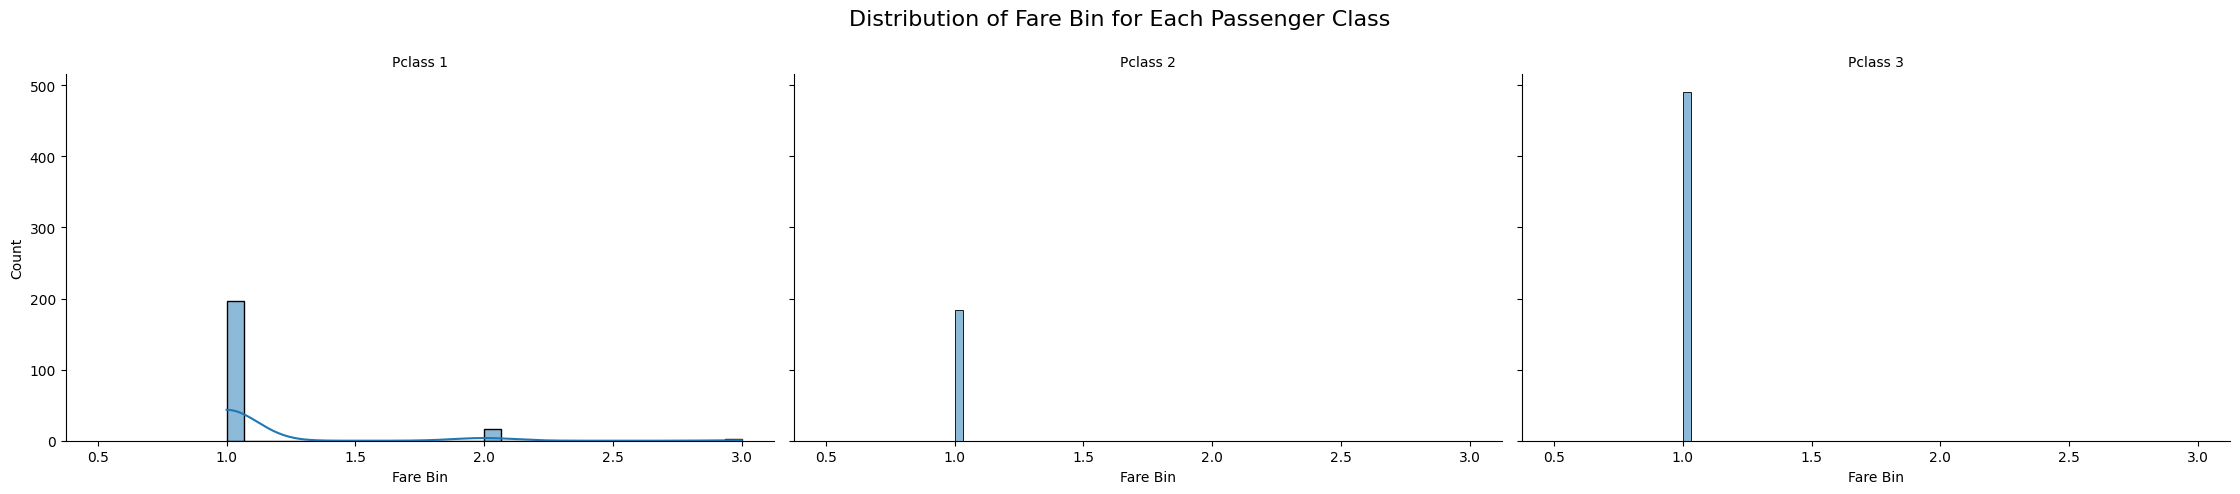

In [55]:
# Set up the FacetGrid
g = sns.FacetGrid(df, col='Pclass', height=5, aspect=1.5)

# Map a histogram to each subset of data
g.map(sns.histplot, 'fare_bin', bins=30, kde=True)

# Add labels and title
g.set_titles("Pclass {col_name}")
g.set_xlabels("Fare Bin")
g.set_ylabels("Count")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Fare Bin for Each Passenger Class', fontsize=16)

# Show the plot
plt.show()

Inference:

From the above we can see that there is not clear relation between Pclass and Fare.
Though passengers in Pclass [2,3] all belong to Fare_Bins Pclass 1 have passengers beloning to all fare ranges.

Which makes interpreting Pclass with Fare inefficient.


In [56]:
df[df["Fare"]>450]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_bin
258,1,1,female,35.0,0,0,512.3292,C,3
679,1,1,male,36.0,0,1,512.3292,C,3
737,1,1,male,35.0,0,0,512.3292,C,3


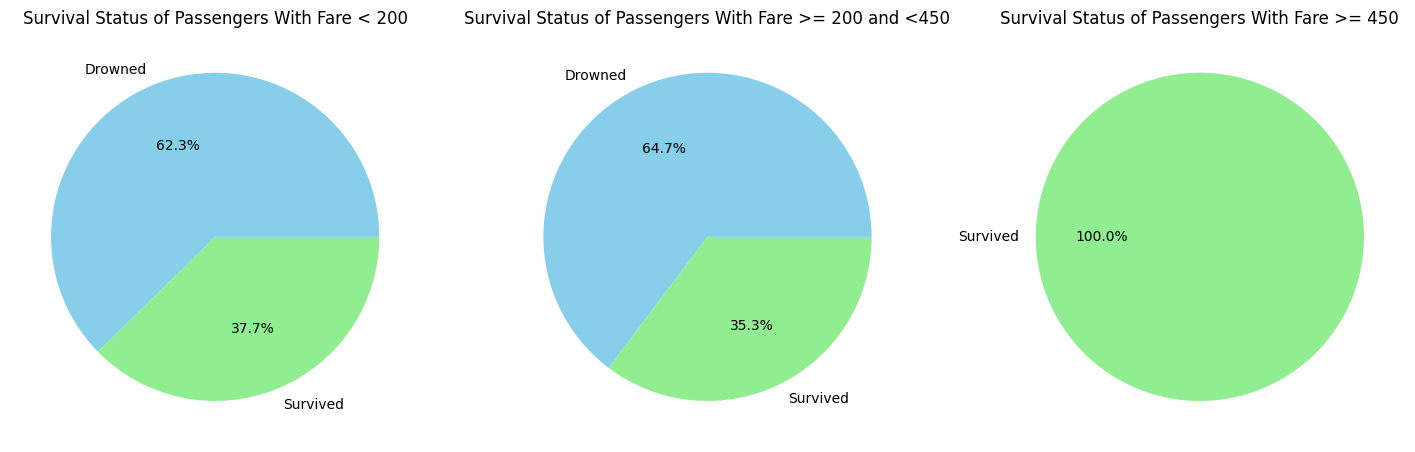

In [57]:
# Filter DataFrame for fare_bin
fare_bin_1 = df[df['fare_bin'] == 1]
fare_bin_2 = df[df['fare_bin'] == 2]
fare_bin_3 = df[df['fare_bin'] == 3]

# Count the number of survivors and non-survivors for each fare bin
survived_counts_1 = fare_bin_1['Survived'].value_counts()
survived_counts_2 = fare_bin_2['Survived'].value_counts()
survived_counts_3 = fare_bin_3['Survived'].value_counts()

# Plot the pie charts
plt.figure(figsize=(18, 6))

# Plot for fare_bin 1
plt.subplot(1, 3, 1)
plt.pie(survived_counts_1, labels=['Drowned', 'Survived'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Survival Status of Passengers With Fare < 200')

# Plot for fare_bin 2
plt.subplot(1, 3, 2)
plt.pie(survived_counts_2, labels=['Drowned', 'Survived'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Survival Status of Passengers With Fare >= 200 and <450')

# Plot for fare_bin 3
plt.subplot(1, 3, 3)
plt.pie(survived_counts_3, labels=['Survived'], autopct='%1.1f%%', colors=['lightgreen'])
plt.title('Survival Status of Passengers With Fare >= 450')

plt.show()

# print(f"Fare_Bin_1: {survived_counts_1},Fare_Bin_2: {survived_counts_2},Fare_Bin_3: {survived_counts_3}")


Inference:

We can see that all passengers with fare > 450 have all survived.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 1200x600 with 0 Axes>

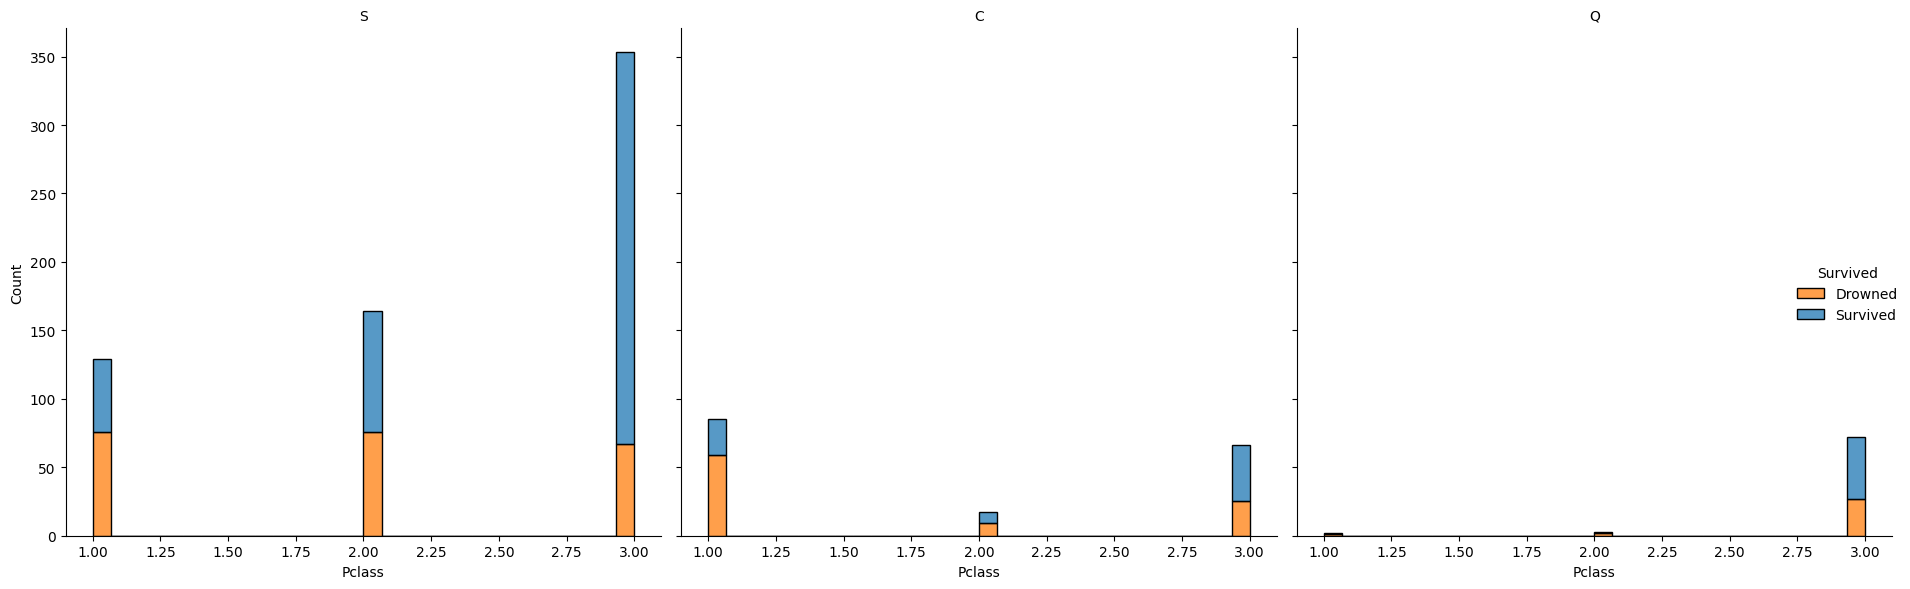

In [58]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a FacetGrid with two columns (one for each sex)
g = sns.FacetGrid(df, col='Embarked', height=6)

# Map a histogram to each subset of data
g.map_dataframe(sns.histplot, x='Pclass', hue='Survived', multiple='stack', bins=30)

# Add title and labels
g.set_titles('{col_name}')
g.set_xlabels('Pclass')
g.set_ylabels('Count')

# Add a legend
g.add_legend(title='Survived', labels=['Drowned', 'Survived'])

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-59-77e004af0d69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
<ipython-input-59-77e004af0d69>:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,


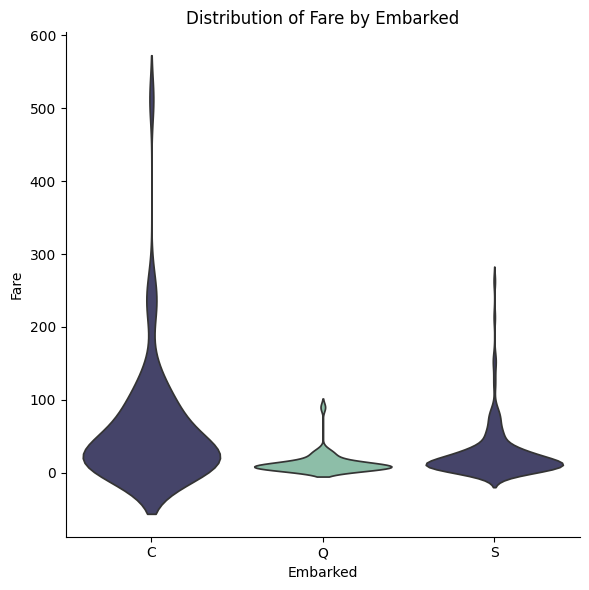

In [59]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=df, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [60]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [61]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num in [2,3,4]:
        return 'small'
    elif num in [5,6,7]:
        return 'large'
    else:
        return "verylarge"


In [62]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [63]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small,verylarge
Survived,,,,
0,69.646182,79.591837,42.123288,100.0
1,30.353818,20.408163,57.876712,0.0


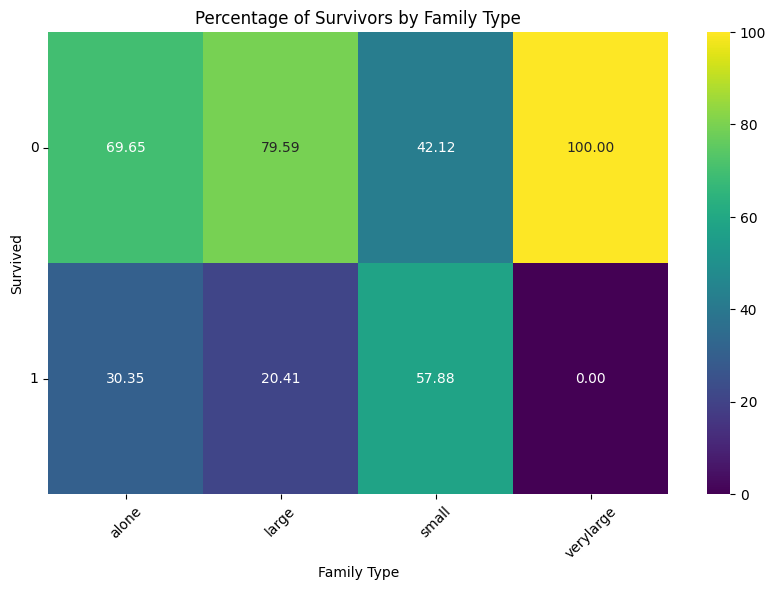

In [64]:
# Compute the normalized cross-tabulation
normalized_cross_tab = pd.crosstab(df['Survived'], df['family_type'], normalize='columns') * 100

# Plot the normalized cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cross_tab, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Percentage of Survivors by Family Type')
plt.xlabel('Family Type')
plt.ylabel('Survived')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Inference:

We can see that maybe family was given preference since the percentage of passengers with family have survived.

In [68]:
df[df['family_type']=='verylarge']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_bin,family_size,family_type
59,0,3,male,11.000000,5,2,46.90,S,1,8,verylarge
71,0,3,female,16.000000,5,2,46.90,S,1,8,verylarge
159,0,3,male,29.699118,8,2,69.55,S,1,11,verylarge
180,0,3,female,29.699118,8,2,69.55,S,1,11,verylarge
201,0,3,male,29.699118,8,2,69.55,S,1,11,verylarge
324,0,3,male,29.699118,8,2,69.55,S,1,11,verylarge
386,0,3,male,1.000000,5,2,46.90,S,1,8,verylarge
480,0,3,male,9.000000,5,2,46.90,S,1,8,verylarge
678,0,3,female,43.000000,1,6,46.90,S,1,8,verylarge
683,0,3,male,14.000000,5,2,46.90,S,1,8,verylarge


In [65]:
df1 = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df1.drop(['fare_bin'],axis=1,inplace=True)
df1.dropna(inplace=True)

<ipython-input-66-0c89e1a44e97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


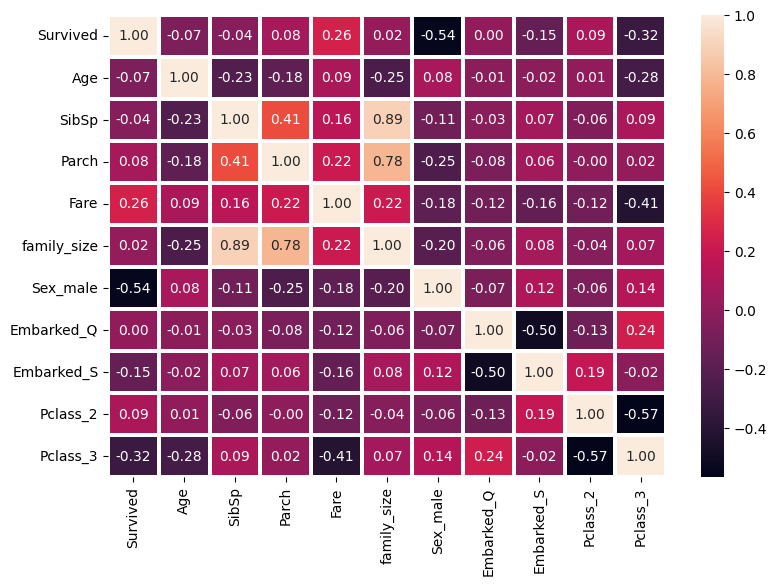

In [66]:
corr = df1.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Inference:

We can see from the correlation matrix that the Fare and class have the highest correlation with the target variable.

Survived and Fare positively correlated, Survived and Sex_male negatively correlated.
Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

# Conclusion:

After performing EDA I found that  features like Sex, Age, Embarked have a strong impoact on the target.

38% passengers survived while 61% drowned.

Percentage of passengers with family have survived.But in addition to that we see that very large families have not survived while smaller families have more percentage of survivors.

The verylarge family belongs to Pclass 3 which may indicate that families were not given equal preference instead they were biased and gave preference to Pclass 1 and 2.

females from 3rd class in Age group 40+ drowned except one.

We can also infer that women and children from 1st and 2nd class have been given preference.

Even though class based preference was visible, the plots show that most of the male passengers of the first class have drowned too.

Also, we can infer that Fare > 450 have all survived.

Most passengers who embarked at Queenstown are 3rd class passengers

Most passengers have embarked at Southampton.